In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
import numpy as np
import pandas as pd
from os import listdir
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
print(os.listdir(r"C:\Users\YooJin\Desktop\topcit\data")) 

['sampleSubmission.csv', 'test1', 'train']


In [27]:
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3
batch_size = 15

In [28]:
def create_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

In [29]:
test_filenames = os.listdir("C:\\Users\\YooJin\\Desktop\\topcit\\data\\test1\\") #여기서 원하는 디렉토리(폴더) 지정
test_df = pd.DataFrame({
    'filename' : test_filenames
})
nb_samples = test_df.shape[0]

In [30]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
  test_df,
  "C:\\Users\\YooJin\\Desktop\\topcit\\data\\test1\\",
  x_col='filename',
  y_col=None,
  class_mode=None,
  target_size=IMAGE_SIZE,
  batch_size=batch_size,
  shuffle=False
)

Found 12500 images.


In [31]:
model = create_model()
model.load_weights("C:\\Users\\YooJin\\Desktop\\topcit\\model.h5") #모델 load

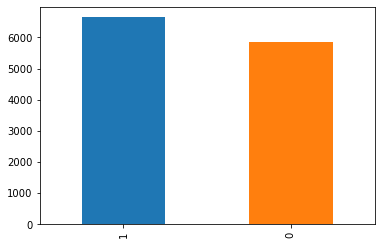

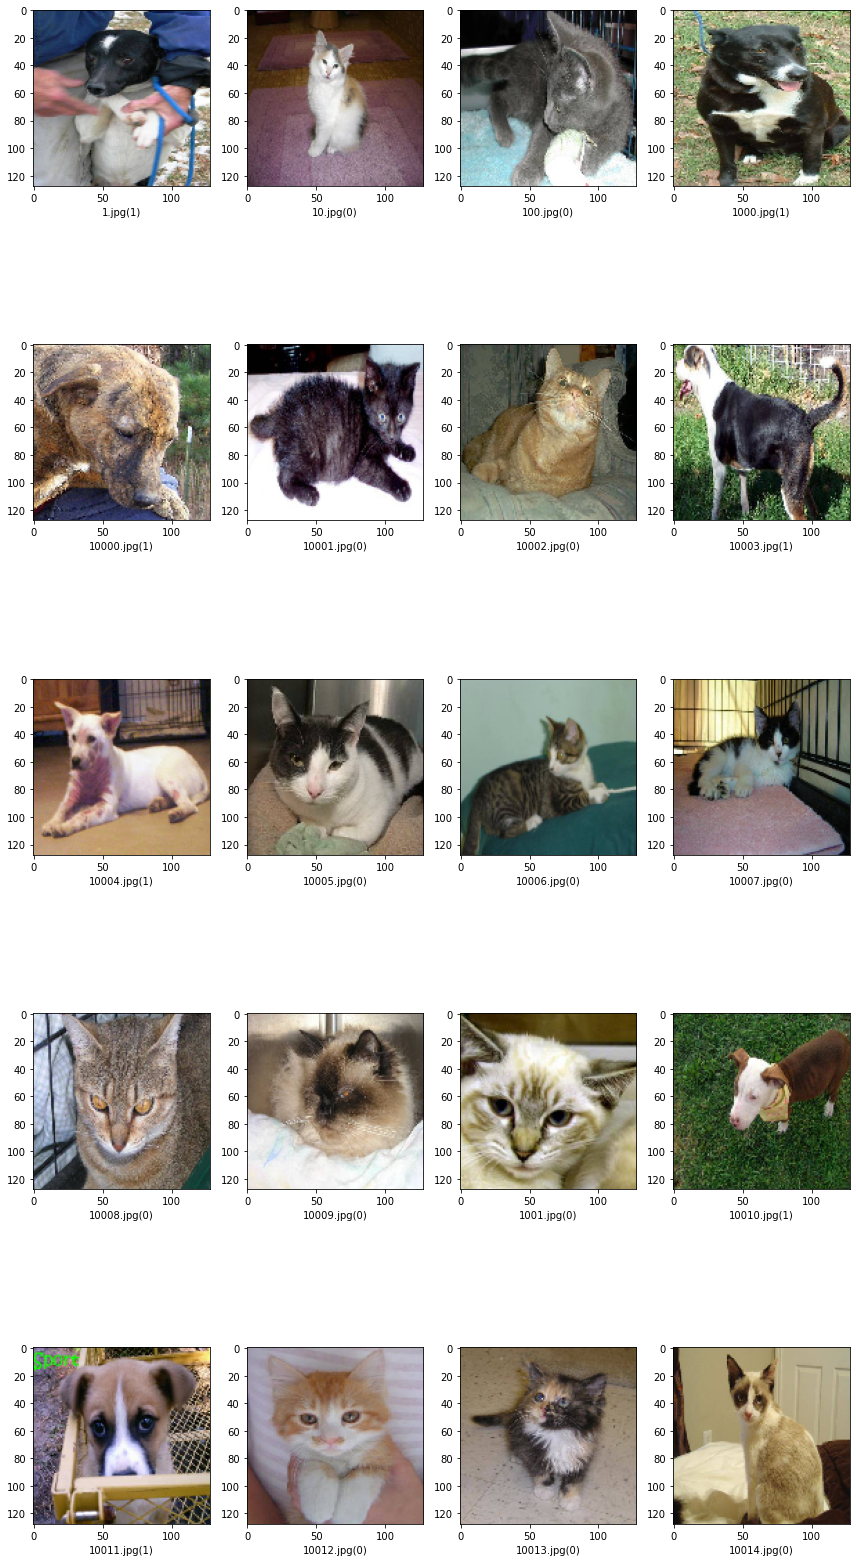

In [34]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))
test_df['category'] = np.argmax(predict, axis=-1)
test_df['category'].value_counts().plot.bar()
sample_test = test_df.head(20)
sample_test.head()
plt.figure(figsize=(12,24))
for index, row in sample_test.iterrows():
  filename = row['filename']
  category = row['category']
  img = load_img("C:\\Users\\YooJin\\Desktop\\topcit\\data\\test1\\"+filename, target_size=IMAGE_SIZE)
  plt.subplot(5,4,index+1)
  plt.imshow(img)
  plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

#개가 1, 고양이가 0으로 나오면 정답이다.